<a href="https://colab.research.google.com/github/Nuzhattttt/braintumor/blob/main/CNN_without_FL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:

train_directory = '/content/gdrive/MyDrive/Amar dataset/dataset/Training'
test_directory = '/content/gdrive/MyDrive/Amar dataset/dataset/Testing'

In [6]:
image_size = (128, 128)
train_images = []
train_labels = []
test_images = []
test_labels = []


In [7]:

def load_and_preprocess_images(directory, images_list, labels_list):
    for class_name in os.listdir(directory):
        class_directory = os.path.join(directory, class_name)

        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path).convert("RGB")
                image = image.resize(image_size, Image.LANCZOS)
                images_list.append(image)
                labels_list.append(class_name)

In [8]:
load_and_preprocess_images(train_directory, train_images, train_labels)

In [9]:
load_and_preprocess_images(test_directory, test_images, test_labels)

In [10]:

label_encoder = LabelEncoder()
train_encoded_labels = label_encoder.fit_transform(train_labels)
test_encoded_labels = label_encoder.transform(test_labels)

In [11]:

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [12]:
X_train = np.array([np.array(img) for img in train_images])
y_train = np.array(train_encoded_labels)

In [13]:
augmented_images = []

for image in X_train:
    augmented_image = datagen.random_transform(image)
    augmented_images.append(augmented_image)

In [14]:

X_train_augmented = np.array(augmented_images)
X_test = np.array([np.array(img) for img in test_images])
y_test = np.array(test_encoded_labels)


In [15]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5722, 128, 128, 3)
y_train shape: (5722,)
X_test shape: (1311, 128, 128, 3)
y_test shape: (1311,)


In [16]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [17]:
model_CNN = tf.keras.Sequential()
model_CNN.add(layers.InputLayer(input_shape=(128, 128, 3)))

model_CNN.add(layers.Conv2D(32, (5, 5), activation='relu'))
model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(layers.BatchNormalization())
model_CNN.add(layers.Dropout(0.25))

model_CNN.add(layers.Conv2D(64, (4, 4), activation='relu'))
model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(layers.BatchNormalization())
model_CNN.add(layers.Dropout(0.25))

model_CNN.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(layers.BatchNormalization())
model_CNN.add(layers.Dropout(0.25))

model_CNN.add(layers.Conv2D(256, (2, 2), activation='relu'))
model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(layers.BatchNormalization())
model_CNN.add(layers.Dropout(0.25))

model_CNN.add(layers.Flatten())
model_CNN.add(layers.Dense(2048, activation='relu'))
model_CNN.add(layers.Dropout(0.25))
model_CNN.add(layers.Dense(4, activation='softmax'))

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99)
model_CNN.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
import time

In [19]:
from tensorflow.keras.utils import to_categorical

num_classes = 4
y_train_encoded = to_categorical(y_train, num_classes=num_classes)


In [32]:
# t1=time.time()
history_CNN = model_CNN.fit(
    X_train, y_train_encoded,
    batch_size=64,
    epochs=25,
)
# t2 = time.time()
# print('The training of 30 epochs of the CNN model took', round((t2 - t1) / 60), 'minutes.')

Epoch 1/25
90/90 [==============================] - 327s 4s/step - loss: 0.0666 - accuracy: 0.9836
Epoch 2/25
90/90 [==============================] - 331s 4s/step - loss: 0.0606 - accuracy: 0.9841
Epoch 3/25
90/90 [==============================] - 326s 4s/step - loss: 0.0335 - accuracy: 0.9888
Epoch 4/25
90/90 [==============================] - 325s 4s/step - loss: 0.0407 - accuracy: 0.9918
Epoch 5/25
90/90 [==============================] - 328s 4s/step - loss: 0.0410 - accuracy: 0.9893
Epoch 6/25
90/90 [==============================] - 328s 4s/step - loss: 0.0692 - accuracy: 0.9855
Epoch 7/25
90/90 [==============================] - 332s 4s/step - loss: 0.0635 - accuracy: 0.9869
Epoch 8/25
90/90 [==============================] - 327s 4s/step - loss: 0.0386 - accuracy: 0.9902
Epoch 9/25
90/90 [==============================] - 326s 4s/step - loss: 0.0200 - accuracy: 0.9934
Epoch 10/25
90/90 [==============================] - 325s 4s/step - loss: 0.0147 - accuracy: 0.9956
Epoch 11/

In [34]:
model_CNN.save('CNN_25epochs')

In [35]:
from tensorflow.keras.utils import to_categorical
num_classes = 4
y_test_encoded = to_categorical(y_test, num_classes=num_classes)


In [36]:
val_loss_CNN, val_accuracy_CNN = model_CNN.evaluate(X_test, y_test_encoded)


41/41 [==============================] - 19s 462ms/step - loss: 0.2110 - accuracy: 0.9695


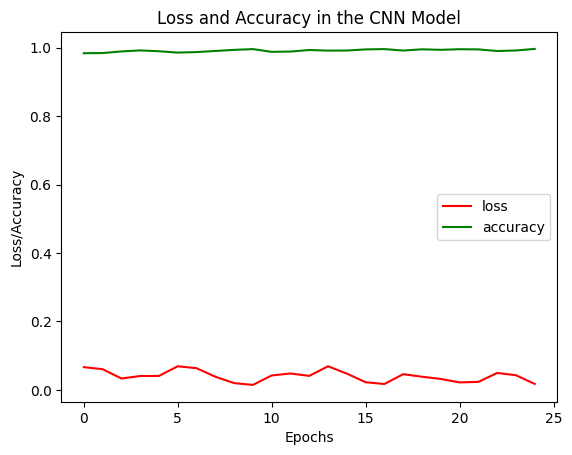

In [37]:
plt.plot(history_CNN.history["loss"], c="red")
plt.plot(history_CNN.history["accuracy"], c="green")
plt.title("Loss and Accuracy in the CNN Model")
plt.ylabel("Loss/Accuracy")
plt.xlabel("Epochs")
plt.legend(['loss', 'accuracy'])
plt.show()

41/41 [==============================] - 18s 441ms/step


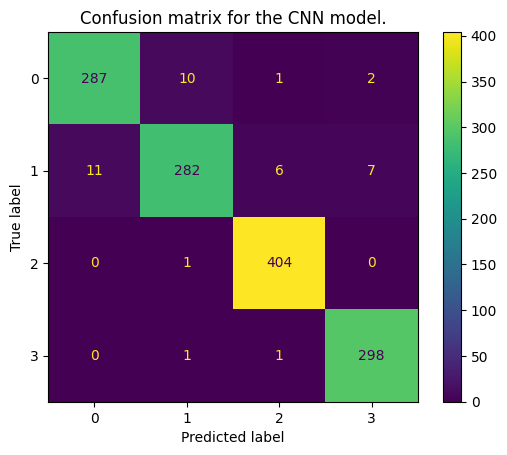

In [38]:
predictions_CNN = np.argmax(model_CNN.predict(X_test), axis=1)
disp_CNN = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_CNN))
disp_CNN.plot()
disp_CNN.ax_.set_title("Confusion matrix for the CNN model.")
plt.show()
